# TODO: Import the required libraries

In [4]:
# TODO
import os
import numpy as np
import tensorflow as tf
import random
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, LayerNormalization, GRU
import matplotlib.pyplot as plt

# Adding random seed

In [5]:
# Set environment variables
os.environ['PYTHONHASHSEED'] = str(25)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Set seed values
np.random.seed(25)
tf.random.set_seed(25)
random.seed(25)

# TODO: Read and Preprocess the dataset

In [6]:
path = './sample_data/alice.txt'
text = ""

# TODO: Load and preprocess the text
with open(path, 'r') as file:
    text = file.read().lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)

In [7]:
print(len(text))

140263


In [8]:
# print(text)

# TODO: Using tokenizers

In [9]:
# TODO: Tokenize the text
# Tokenizer from keras available at: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [10]:
print(total_words)

2750


# TODO: Feature Engineering

In [11]:
# TODO: Create input sequences
# Split by lines and converting each line into a list of tokenized words
input_sequences = []
for line in text.split('\n'):
    # print(line)
    # print(tokenizer.texts_to_sequences([line]))
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(len(input_sequences))
# TODO: Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
# print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
print(len(input_sequences))

23692


# TODO: Storing features and labels

In [13]:
# TODO: Create predictors and labels
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = tf.keras.utils.to_categorical(label, num_classes=total_words)
print(input_sequences)
print(np.shape(input_sequences))
print(np.shape(label))
print(np.shape(predictors))
# print(predictors)
# TODO: Split the data into training and validation sets
split = int(0.8 * len(predictors))
X_train, X_val = predictors[:split], predictors[split:]
y_train, y_val = label[:split], label[split:]

print(f'Train set size: {len(X_train)}, Validation set size: {len(X_val)}')


[[   0    0    0 ...    0  274  465]
 [   0    0    0 ...  274  465   11]
 [   0    0    0 ...  465   11  682]
 ...
 [   0    0    0 ...    1 2749 1452]
 [   0    0    0 ... 2749 1452  793]
 [   0    0    0 ...    0    1  212]]
(23692, 16)
(23692, 2750)
(23692, 15)
Train set size: 18953, Validation set size: 4739


# TODO: Building our model

In [14]:
# TODO: Build your model
# model is the initial based model, we will build later improved models
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           275000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 2750)              415250    
                                                                 
Total params: 840850 (3.21 MB)
Trainable params: 840850 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# TODO: Model training

In [15]:
# TODO: Train your model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
593/593 [==============================] - 30s 45ms/step - loss: 6.1984 - accuracy: 0.0570 - val_loss: 6.1080 - val_accuracy: 0.0893
Epoch 2/20
593/593 [==============================] - 27s 45ms/step - loss: 5.7520 - accuracy: 0.0713 - val_loss: 5.9951 - val_accuracy: 0.1023
Epoch 3/20
593/593 [==============================] - 27s 45ms/step - loss: 5.4305 - accuracy: 0.0977 - val_loss: 5.8855 - val_accuracy: 0.1161
Epoch 4/20
593/593 [==============================] - 26s 44ms/step - loss: 5.1200 - accuracy: 0.1200 - val_loss: 5.8424 - val_accuracy: 0.1234
Epoch 5/20
593/593 [==============================] - 28s 47ms/step - loss: 4.8406 - accuracy: 0.1458 - val_loss: 5.8401 - val_accuracy: 0.1310
Epoch 6/20
593/593 [==============================] - 27s 45ms/step - loss: 4.5884 - accuracy: 0.1624 - val_loss: 5.8806 - val_accuracy: 0.1376
Epoch 7/20
593/593 [==============================] - 26s 44ms/step - loss: 4.3567 - accuracy: 0.1810 - val_loss: 5.9311 - val_accuracy:

# TODO: Visualising the Training and Validation Accuracies and Losses against the number of Epochs

In [16]:
# TODO: Plotting the training and validation loss and accuracy
def plot_result(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

# plot_result(history, "accuracy")
# plot_result(history, "loss")

## Adding Dropout

In [17]:
dropout_model = Sequential()
dropout_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
dropout_model.add(LSTM(150))
dropout_model.add(Dropout(0.2))
dropout_model.add(Dense(total_words, activation='softmax'))

dropout_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dropout_model.summary()

dropout_history = dropout_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 100)           275000    
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 2750)              415250    
                                                                 
Total params: 840850 (3.21 MB)
Trainable params: 840850 (3.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
593/593 [==============================] - 30s 46ms/step - loss: 6.1826 - accuracy: 0.0555 - val_loss: 6.0954 - val_accuracy: 0.0857
Epoch 

In [18]:
# Plot dropout model history
# plot_result(dropout_history, "accuracy")
# plot_result(dropout_history, "loss")

## Using Bidirectional LSTM

In [19]:
# Model with Bidirectional LSTM
bidirectional_model = Sequential()
bidirectional_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
bidirectional_model.add(Bidirectional(LSTM(150)))
bidirectional_model.add(Dropout(0.2))
bidirectional_model.add(Dense(total_words, activation='softmax'))

bidirectional_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bidirectional_model.summary()

bidirectional_history = bidirectional_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 15, 100)           275000    
                                                                 
 bidirectional (Bidirection  (None, 300)               301200    
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 2750)              827750    
                                                                 
Total params: 1403950 (5.36 MB)
Trainable params: 1403950 (5.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
593/593 [==============================] - 56s 87ms/step - loss: 6.1644

In [20]:
# plot_result(bidirectional_history, "accuracy")
# plot_result(bidirectional_history, "loss")

## Adding LayerNormalization


In [21]:
LayerNormalizationModel = Sequential()
LayerNormalizationModel.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
LayerNormalizationModel.add(Bidirectional(LSTM(150, return_sequences=True)))
LayerNormalizationModel.add(Dropout(0.2))
LayerNormalizationModel.add(LayerNormalization())
LayerNormalizationModel.add(LSTM(100))
LayerNormalizationModel.add(Dropout(0.2))
LayerNormalizationModel.add(Dense(total_words, activation='softmax'))

LayerNormalizationModel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
LayerNormalizationModel.summary()

LayerNormalization_history = LayerNormalizationModel.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           275000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 15, 300)           301200    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 15, 300)           0         
                                                                 
 layer_normalization (Layer  (None, 15, 300)           600       
 Normalization)                                                  
                                                                 
 lstm_4 (LSTM)               (None, 100)               160400    
                                                                 
 dropout_3 (Dropout)         (None, 100)              

In [22]:
# plot_result(LayerNormalization_history, "accuracy")
# plot_result(LayerNormalization_history, "loss")

## Model with GRU


In [23]:
# Model with GRU
gru_model = Sequential()
gru_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
gru_model.add(GRU(150, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(LayerNormalization())
gru_model.add(GRU(100))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(total_words, activation='softmax'))

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.summary()

gru_history = gru_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Plotting GRU model's training and validation accuracy and loss
# plot_result(gru_history, "accuracy")
# plot_result(gru_history, "loss")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 100)           275000    
                                                                 
 gru (GRU)                   (None, 15, 150)           113400    
                                                                 
 dropout_4 (Dropout)         (None, 15, 150)           0         
                                                                 
 layer_normalization_1 (Lay  (None, 15, 150)           300       
 erNormalization)                                                
                                                                 
 gru_1 (GRU)                 (None, 100)               75600     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                      

## Using Attention Mechanism

In [24]:
# import tensorflow_addons as tfa

# Custom Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)

    def call(self, x):
        e = tf.keras.activations.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.keras.activations.softmax(e, axis=1)
        output = x * a
        return tf.reduce_sum(output, axis=1)

# Model with Attention
attention_model = Sequential()
attention_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
attention_model.add(Bidirectional(LSTM(150, return_sequences=True)))
attention_model.add(Attention())
attention_model.add(Dropout(0.2))
attention_model.add(Dense(total_words, activation='softmax'))

attention_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
attention_model.summary()

attention_history = attention_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

# Plotting Attention model's training and validation accuracy and loss
# plot_result(attention_history, "accuracy")
# plot_result(attention_history, "loss")


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 15, 100)           275000    
                                                                 
 bidirectional_2 (Bidirecti  (None, 15, 300)           301200    
 onal)                                                           
                                                                 
 attention (Attention)       (None, 300)               90300     
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 2750)              827750    
                                                                 
Total params: 1494250 (5.70 MB)
Trainable params: 1494250 (5.70 MB)
Non-trainable params: 0 (0.00 Byte)
________________

## Using EarlyStopping


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Model with Early Stopping and Learning Rate Scheduling
final_model = Sequential()
final_model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
final_model.add(Bidirectional(LSTM(150, return_sequences=True)))
final_model.add(Dropout(0.2))
final_model.add(LayerNormalization())
final_model.add(LSTM(100))
final_model.add(Dropout(0.2))
final_model.add(Dense(total_words, activation='softmax'))

final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
final_model.summary()

final_history = final_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1,
                                callbacks=[early_stopping, reduce_lr])

# Plot the final model's training and validation accuracy and loss
# plot_result(final_history, "accuracy")
# plot_result(final_history, "loss")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 15, 100)           275000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 15, 300)           301200    
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 15, 300)           0         
                                                                 
 layer_normalization_2 (Lay  (None, 15, 300)           600       
 erNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 100)               160400    
                                                                 
 dropout_8 (Dropout)         (None, 100)              

# TODO: Generate text

In [26]:
# TODO: Function to generate text
def generate_text(seed_text, next_words, model, max_sequence_len, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predictions = model.predict(token_list, verbose=0)[0]

        # Apply temperature
        predictions = np.log(predictions) / temperature
        predictions = np.exp(predictions) / np.sum(np.exp(predictions))

        predicted_index = np.random.choice(range(len(predictions)), p=predictions)
        output_word = tokenizer.index_word[predicted_index]
        seed_text += " " + output_word
    return seed_text

# Generate text
seed_text = "Forest is"
next_words = 10
generated_text_1 = generate_text(seed_text, next_words, final_model, max_sequence_len, temperature=0.05)
generated_text_2 = generate_text(seed_text, next_words, final_model, max_sequence_len, temperature=1.5)

print("Generated Text with Temperature 0.05:", generated_text_1)
print("Generated Text with Temperature 1.5:", generated_text_2)

Generated Text with Temperature 0.05: Forest is the queen and the queen and the queen and the
Generated Text with Temperature 1.5: Forest is herself it from theres very kitchen if thats some hint


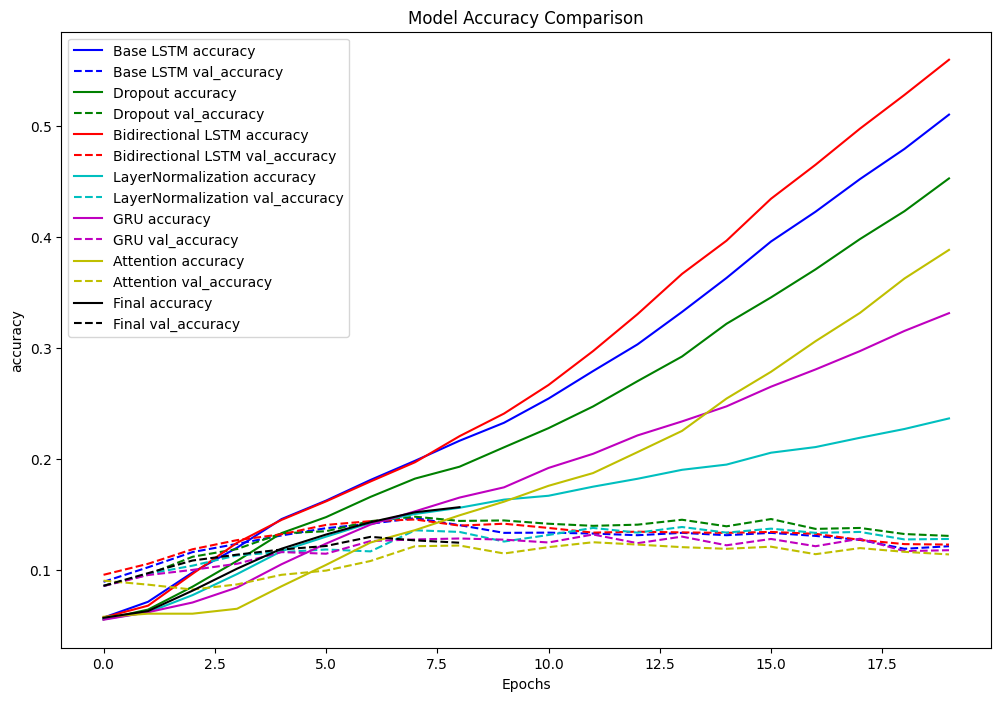

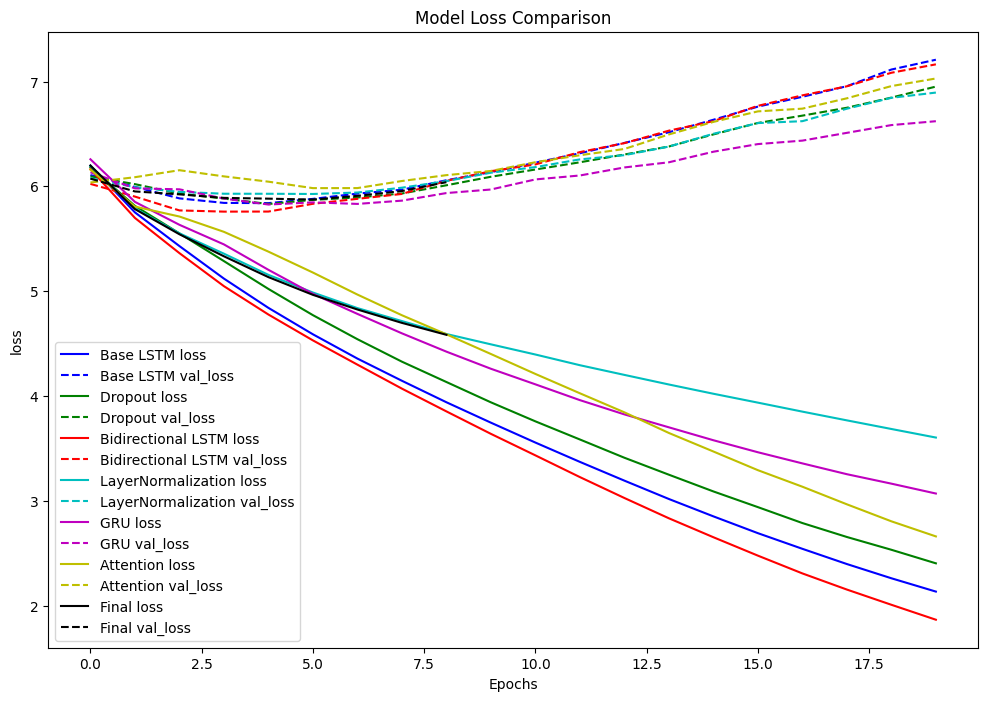

In [29]:
import matplotlib.pyplot as plt

def plot_all_histories(histories, labels, metric):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
    plt.figure(figsize=(12, 8))

    for i, history in enumerate(histories):
        plt.plot(history.history[metric], color=colors[i], linestyle='-', label=f'{labels[i]} {metric}')
        plt.plot(history.history['val_' + metric], color=colors[i], linestyle='--', label=f'{labels[i]} val_{metric}')

    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.show()

histories = [
    history, dropout_history, bidirectional_history,
    LayerNormalization_history, gru_history, attention_history, final_history
]

labels = [
    'Base LSTM', 'Dropout', 'Bidirectional LSTM',
    'LayerNormalization', 'GRU', 'Attention', 'Final'
]

plot_all_histories(histories, labels, "accuracy")
plot_all_histories(histories, labels, "loss")